- 참고 : https://bestinvestments.tistory.com/33

- 우리나라 증시에 영향을 미치는 미국 증시의 요소를 활용
    - 미국 국채 금리
    - 미국 국채 금리를 이용한 장단기 금리차
    - 변동성지수(공포지수) : VIX
    - 금융 신용경색 지표 : TED Spread
    - 금융 스트레스 지수

In [1]:
!pip install finance-datareader

In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd

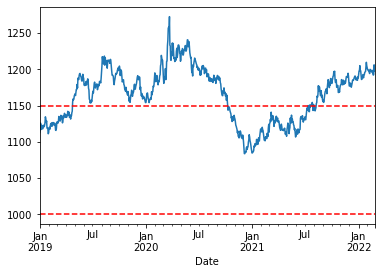

In [10]:
# 원 달러 환율
USE_KRX = fdr.DataReader('USD/KRW', start='2019-01-01') 
graph = USE_KRX.loc[:, 'Close'].plot()
graph.axhline(1000, ls='--', color='r') # 1000 선
graph.axhline(1150, ls='--', color='r') # 1150 선

          AUD/CHF     KOSPI
AUD/CHF  1.000000  0.816749
KOSPI    0.816749  1.000000


<AxesSubplot:xlabel='Date'>

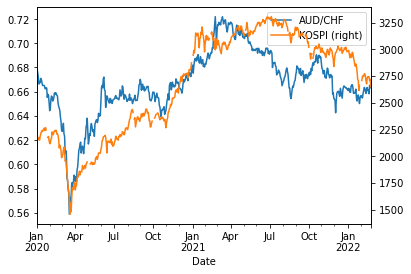

In [5]:
# 호주 달러/스위스 프랑과 코스피 관계 : 코스피 지수와 상관계수가 높은 호주달러/스위스 프랑 그래프 구현
AUD_CHF = fdr.DataReader("AUD/CHF", start="2020-01-01")
KOSPI = fdr.DataReader("KS11", start="2020-01-01")
concat_data = pd.concat([AUD_CHF["Close"], KOSPI["Close"]], axis=1)
concat_data.columns = ["AUD/CHF", "KOSPI"]
data = concat_data.loc["2020-01-01":]
print(data.corr())  # 상관계수
data.plot(secondary_y="KOSPI")

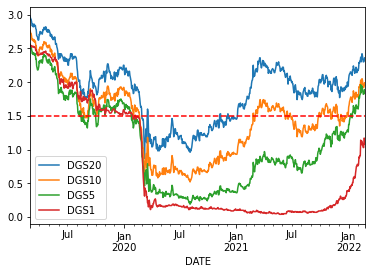

In [6]:
# 미국 국채 금리 (20년, 10년, 5년, 1년)
DGS = fdr.DataReader(['DGS20', 'DGS10', 'DGS5', 'DGS1'], start="2019-03-01", data_source="fred")
graph = DGS.plot()
graph.axhline(1.5, ls="--", color='r')

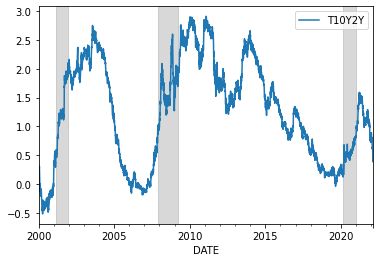

In [12]:
# 장단기 금리차 : 장단기 금리차가 줄어들수록 경제위기가 발생
#   미국 장단기 금리차 = 장기금리(10년물 국채 수익률) - 단기금리(2년물 국채 수익률)
T10Y2Y = fdr.DataReader("T10Y2Y", start="2000-01-01", data_source='fred')
graph = T10Y2Y.plot()
graph.axvspan('2001-03-01', '2001-12-01', color='gray', alpha=0.3)
graph.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.3)
graph.axvspan('2020-03-01', '2020-12-30', color='gray', alpha=0.3)

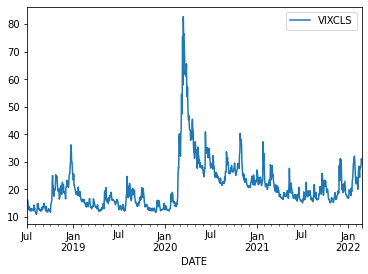

In [13]:
# 변동성 지수(VIX)
VIX = fdr.DataReader("VIXCLS", start='2018-07-01', data_source="fred")
graph = VIX.plot()

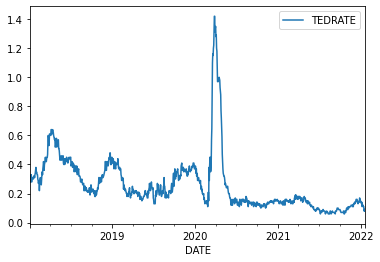

In [14]:
# TED Spread
TEDRATE = fdr.DataReader("TEDRATE", start="2018-01-01", data_source="fred")
graph = TEDRATE.plot()

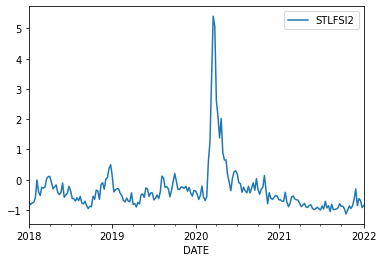

In [15]:
# 금융 스트레스 지수
STLFSI2 = fdr.DataReader("STLFSI2", start="2018-01-01", data_source = "fred")
graph = STLFSI2.plot()